# CMS Distribution by Cluster

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import os

os.chdir('../../')
os.getcwd()

'd:\\Work\\Non PT\\Data Science\\BG\\mcrc-cetuximab-analysis'

In [2]:
# Load annotation files
df1 = pd.read_csv("raw/ann_PRJNA805525.csv")
df2 = pd.read_csv("data/ann_with_cms.csv")

# Rename CMS columns to match
df1["CMS"] = df1["CMS_predicted"]
df2["CMS"] = df2["CMS"]

# Rename ID columns to match clusters.csv
df1["sample_id"] = df1["Patient"]
df2["sample_id"] = df2["sample_id"]

# Combine annotation files
ann_combined = pd.concat([df1, df2], ignore_index=True)

# Load clusters
clusters = pd.read_csv("data/clusters.csv")

# Merge with cluster data
merged = pd.merge(ann_combined, clusters, on="sample_id", how="inner")

# CMS colors
colors = {
    "CMS1": "#FCAF2F",
    "CMS2": "#00B0B6",
    "CMS3": "#C964FF",
    "CMS4": "#00C4F6"
}

# Filter only CMS1–4
filtered = merged[merged["CMS"].isin(colors.keys())]

In [3]:
# Contingency table: Cluster vs CMS
cms_cluster_counts = pd.crosstab(filtered["cluster"], filtered["CMS"])
cms_cluster_counts = cms_cluster_counts[['CMS1', 'CMS2', 'CMS3', 'CMS4']]
cms_cluster_percent = cms_cluster_counts.div(cms_cluster_counts.sum(axis=1), axis=0) * 100
n_total = cms_cluster_counts.sum().sum()

# Chi-square test
chi2, p, dof, _ = chi2_contingency(cms_cluster_counts)

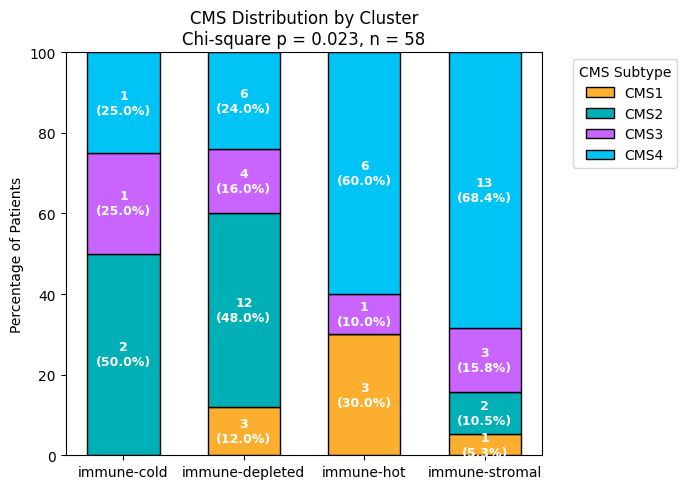

Contingency Table:


CMS,CMS1,CMS2,CMS3,CMS4
cluster,,,,
immune-cold,0,2,1,1
immune-depleted,3,12,4,6
immune-hot,3,0,1,6
immune-stromal,1,2,3,13


In [5]:
# Plotting
fig, ax = plt.subplots(figsize=(7, 5))
bottom = np.zeros(len(cms_cluster_percent))

for cms in colors:
    vals = cms_cluster_percent[cms].values
    counts = cms_cluster_counts[cms].values
    ax.bar(cms_cluster_percent.index, vals, bottom=bottom,
           label=cms, color=colors[cms], width=0.6, edgecolor="black")

    # Add labels
    for i, (val, btm) in enumerate(zip(vals, bottom)):
        if val > 5:
            ax.text(i, btm + val/2, f"{counts[i]}\n({val:.1f}%)",
                    ha='center', va='center', color='white', fontsize=9, weight='bold')
    bottom += vals

# Formatting
ax.set_ylabel("Percentage of Patients")
ax.set_title(f"CMS Distribution by Cluster\nChi-square p = {p:.3f}, n = {n_total}")
ax.set_ylim(0, 100)
ax.legend(title="CMS Subtype", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Display contingency table
print("Contingency Table:")
display(cms_cluster_counts)